In [2]:
import numpy as np
import numpy.testing as ntest
import doctest


* Do Pine Problem 7.5.  Check in a notebook that imports your
python module (call it linfit.py) and runs it.  Follow my example
in bessel_fun.py to provide:

    1.  A docstring in standard numpy format

    2.  Graceful error messages if the arguments to your function won't work

    2.  A test function that runs your fitting routine for a simple 5 point dataset
        and checks the output

### Solution

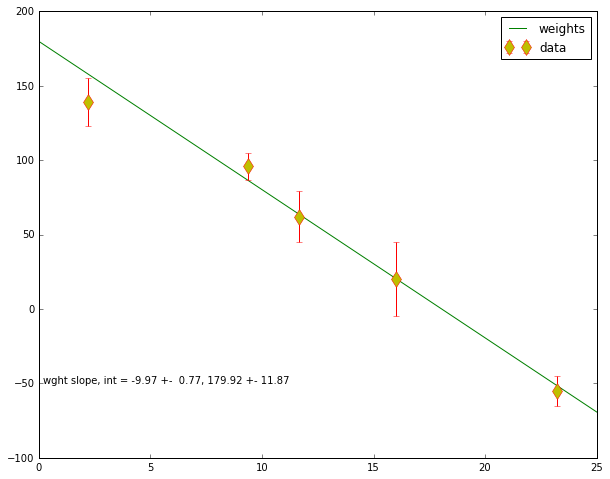

In [18]:
%matplotlib inline

plt.close('all')
from a212libs.utils import read_data
from a212libs.linfit import LineFitWt

data_string = """
time   velocity   uncertainty
   2.23          139               16
   9.37           96                9
  11.64           62               17
  16              20               25
  23.21          -55               10
"""
df_data = read_data(data_string)
time = df_data['time'].values
velocity = df_data['velocity'].values
dy = df_data['uncertainty'].values

fig,ax = plt.subplots(1,1,figsize=(10,8))
out=ax.errorbar('time','velocity',yerr='uncertainty',data=df_data,
                fmt='bo',ecolor='r',marker='d',mec='r',mfc='y',ms=12,zorder=10,
               label='data')
limits=ax.axis()
xvals=np.array(limits[:2])
slope_w,yint_w, var_slope, var_inter = LineFitWt(time,velocity,dy)
yvals = yint_w + slope_w*xvals
ax.plot(xvals,yvals,'g-',label = 'weights')
sigma_slope = np.sqrt(var_slope)
sigma_intercept = np.sqrt(var_inter)
ax.text(0.2,-50,('wght slope, int = {:5.2f} +- {:5.2f},'
                 ' {:5.2f} +- {:5.2f}').format(slope_w,sigma_slope,yint_w,sigma_intercept))
out=ax.legend()
